# Global settings

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import pandas as pd
import scipy.stats as sp
from scipy.stats import linregress
import seaborn as sns
import matplotlib.gridspec as gridspec
import math

sizeup = 3
axes_labelsize = 5 * sizeup
plt.rcParams["axes.titlesize"] = 6 * sizeup
plt.rcParams["axes.labelsize"] = axes_labelsize
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["lines.markersize"] = 5 * sizeup
plt.rcParams["xtick.labelsize"] = 5 * sizeup
plt.rcParams["ytick.labelsize"] = 5 * sizeup
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["legend.fontsize"] = 5 * sizeup
plt.rcParams["axes.linewidth"] = 0.7

# color scheme
col_e = "#c8e7f2ff"
col_i = "#cd5d5dcc"
col_s = "#3e9bbbff"

# Helper functions
def cm2inch(value):
    # transfer the unit of figure size from cm to inch
    return value / 2.54

def pico2nano(pico):
    nano = pico * (0.001)
    return nano

def amp2dev(A):
    delta = 0.5
    tau = 20
    R = 80
    U_short = A * R * (delta / tau)
    return U_short

def vtomilli(v):
    milli = v * (0.001)
    return milli

def rounder(num):
    significant_digits = 1
    min = round(num, significant_digits)
    return min

# Figure One

# Fig 1B: Voltage deviation

alpha: 0.1   Amplitude: 0.5
alpha: 0.30000000000000004   Amplitude: 1.0
alpha: 0.5   Amplitude: 1.5
alpha: 0.7   Amplitude: 2.0
alpha: 0.8999999999999999   Amplitude: 2.5


Text(0, 0.5, 'Membrane Voltmage (mV)')

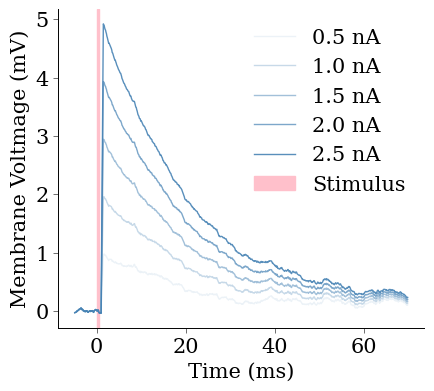

In [207]:
sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.5 * sizeup)

loc = "/Data/voltdev/"
data = np.load(loc + "voltdevdata.npy", allow_pickle=True).item()

plt.figure(figsize=(sizex, sizey))
amplist = data["amplist"]
pulse_start = data["pulse_start"]
pulse_end = data["pulse_end"]
n_trials = data["n_trials"]
theta = data["theta"]
df_summary = data["df_summary"]
freq = data["freq"]


df_summary = df_summary.rename(
    columns={
        500.0: 0.5,
        1000.0: 1,
        1500: 1.5,
        2000: 2,
        2500: 2.5,
        10000: 10,
        30000: 30,
        80000: 80,
    }
)

amplist = [el / 1000 for el in amplist]
amplist_plot = amplist[:5]
alphacount = 0.1
for amp in amplist_plot:
    plt.plot(
        df_summary[amp][0],
        df_summary[amp][1],
        label=str(amp) + " nA",
        color="steelblue",
        alpha=alphacount,
        lw=1,
    )
    print("alpha:", alphacount, " ", "Amplitude:", amp)
    alphacount += 0.2
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvspan(pulse_start, pulse_end, color="pink", label="Stimulus")
plt.legend(bbox_to_anchor=(0.6, 1.15), frameon=False)
plt.legend(loc=1, frameon=False)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltmage (mV)")

# Fig1C: Analytical vs Numerical

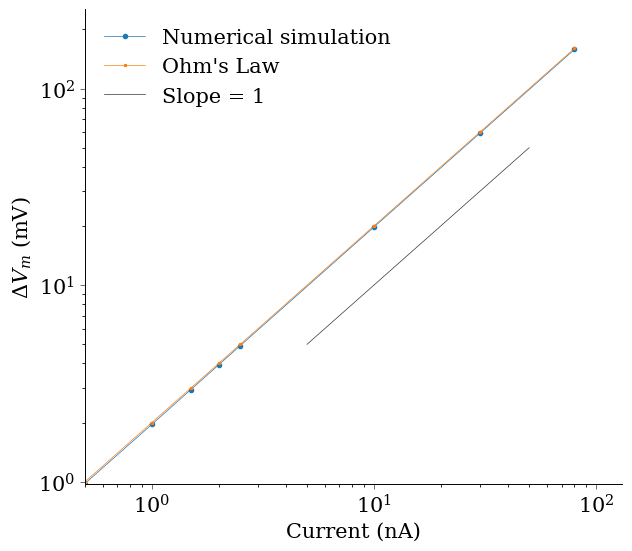

In [208]:
tauMem = 20.0
CMem = 250
R = (tauMem / CMem) * 10**9
tau = 20.0
delta = 0.5  # TMS_pulse_duration

amplist_pA = [
    500.0,
    1000.0,
    1500.0,
    2000.0,
    2500.0,
    10000.0,
    30000.0,
    80000.0,
]  # Values in pA
amplist_nA = [i / 10 ** (3) for i in amplist_pA]  # Value conversion into Amperes
amp_max = []
for amp in amplist_nA:
    amp_max.append(df_summary[amp][1].max())

amplist_A = [i / 10 ** (12) for i in amplist_pA]  # Value conversion into Amperes
U_short = []
for amp in amplist_A:
    U_short.append(amp * R * (delta / tau))

U_short_mV = [i * 10 ** (3) for i in U_short]  # Value conversion into Amperes
scalerx = 1.3
scalery = 1.3
plt.figure(figsize=(sizex * scalerx, sizey * scalery))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.margins(0, 0)

U_short_mV_log = [math.log(x, 10) for x in U_short_mV]
amp_max_log = [math.log(x, 10) for x in amp_max]

plt.loglog(
    amplist, amp_max, base=10, marker="o", markersize=3, label="Numerical simulation"
)
plt.loglog(
    amplist,
    U_short_mV,
    base=10,
    marker="*",
    markersize=2,
    markerfacecolor="none",
    label="Ohm's Law",
)
plt.plot([5, 50], [5, 50], label="Slope = 1", c="black", alpha=0.8)
plt.tight_layout()
plt.ylabel(r"$\Delta$$V_{m}$ (mV)")
plt.xlabel("Current (nA)")
plt.xlim(right=math.log(amplist[-1]) * 30)
plt.ylim(top=math.log(U_short_mV[-1]) * 50)
plt.legend(frameon=False)

# Figure 2

# 2A: Raster plot

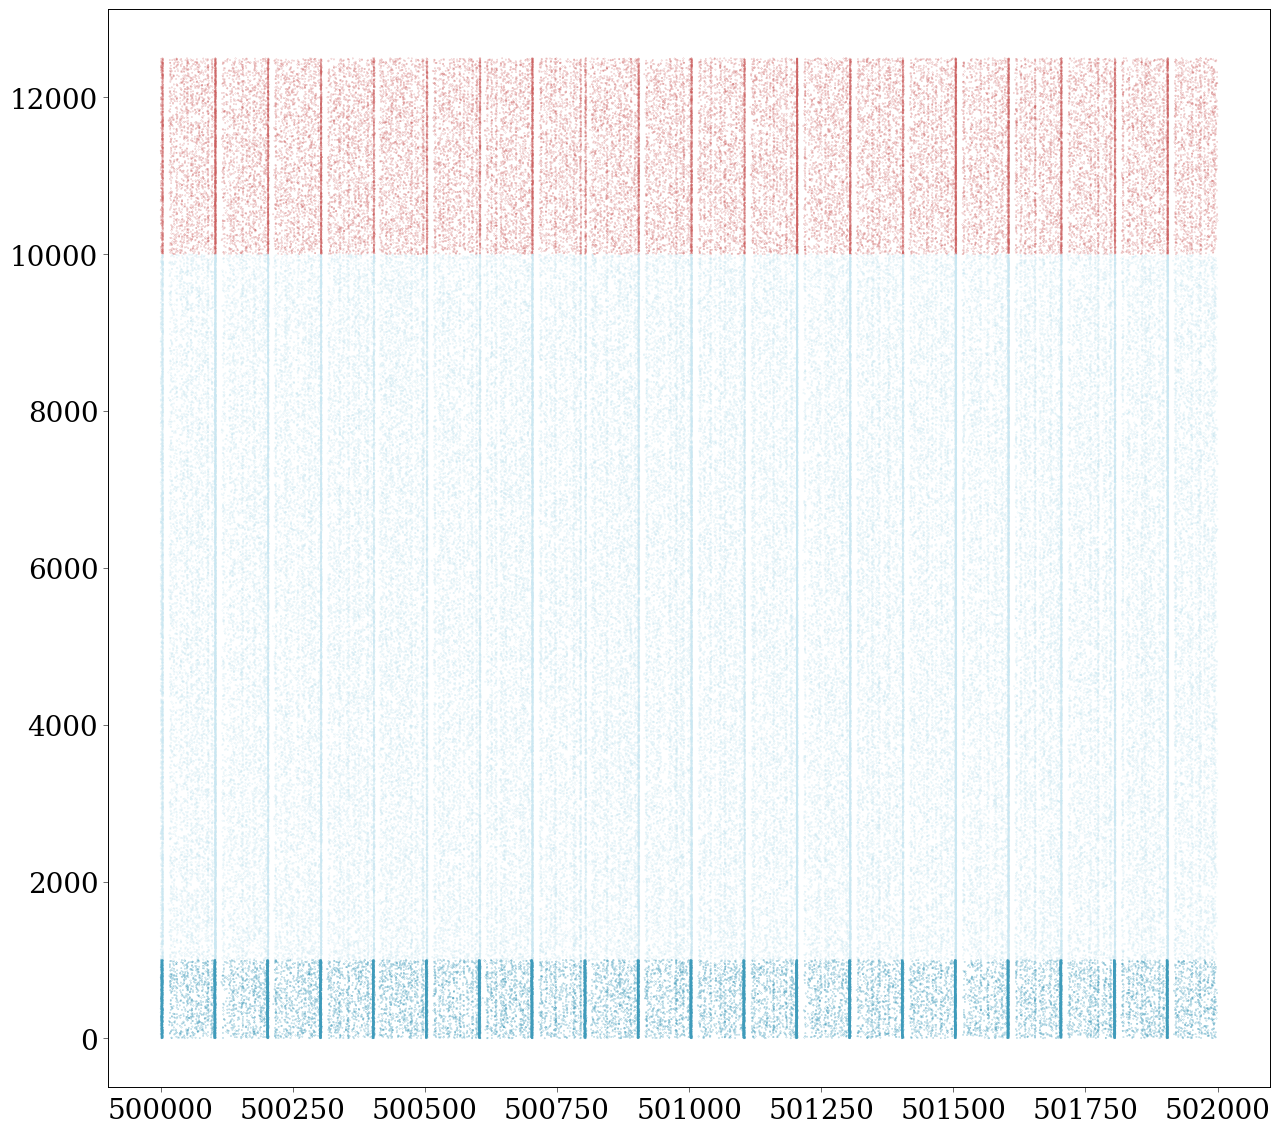

In [211]:
loc = "/Data/10Hz_30nA_900p_10pc_static/"
s_g = np.load(loc + "seed_1_growth_senders_all.npy")
t_g = np.load(loc + "seed_1_growth_times_all.npy")

s_s = np.load(loc + "seed_1_stim_senders_all.npy")
t_s = np.load(loc + "seed_1_stim_times_all.npy")

s_p = np.load(loc + "seed_1_post_senders_all.npy")
t_p = np.load(loc + "seed_1_post_times_all.npy")

s_d = np.load(loc + "seed_1_decay_senders_all.npy")
t_d = np.load(loc + "seed_1_decay_times_all.npy")

x = 2000
n_list = np.arange(0, 12500, 1)
senders_g = []
times_g = []

idx = np.where(t_g < (np.min(t_g) + x))

senders = s_g[idx]
times = t_g[idx]
senders_g = senders
times_g = times

t_toplot = []

for i in n_list:
    idx = np.where(senders_g == i + 1)
    times = times_g[idx]
    t_toplot.append(times)


rightlim = -1
s_toplot = []
for xx in range(0, len(n_list)):
    s_toplot.append(np.zeros(len(t_toplot[xx])))
idx = 0
for num in n_list:
    s_toplot[idx][:] = num
    idx += 1

t_g_toplot = t_toplot
s_g_toplot = s_toplot


n_list = np.arange(0, 12500, 1)
senders_s = []
times_s = []

idx = np.where(t_s < (np.min(t_s) + x))
senders = s_s[idx]
times = t_s[idx]
senders_s = senders
times_s = times

for i in n_list:
    idx = np.where(senders_s == i + 1)
    times = times_s[idx]
    t_toplot.append(times)


rightlim = -1
s_toplot = []
for xx in range(0, len(n_list)):
    s_toplot.append(np.zeros(len(t_toplot[xx])))
idx = 0
for num in n_list:
    s_toplot[idx][:] = num
    idx += 1

t_s_toplot = t_toplot
s_s_toplot = s_toplot
n_list = np.arange(0, 12500, 1)
senders_p = []
times_p = []
idx = np.where(t_p < (np.min(t_p) + x))
senders = s_p[idx]
times = t_p[idx]
senders_p = senders
times_p = times

for i in n_list:
    idx = np.where(senders_p == i + 1)
    times = times_p[idx]
    t_toplot.append(times)

rightlim = -1
s_toplot = []
for xx in range(0, len(n_list)):
    s_toplot.append(np.zeros(len(t_toplot[xx])))
idx = 0
for num in n_list:
    s_toplot[idx][:] = num
    idx += 1
t_p_toplot = t_toplot
s_p_toplot = s_toplot

rightlim = -1

NE = 10000  # exc pop
NI = 2500  # inh pop
stimpop = 1000

plt.figure(figsize=(15, 14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Define colors based on x-values using NumPy
colors = np.where(senders_s <= stimpop, col_s, np.where(senders_s <= NE, col_e, col_i))

plt.scatter(times_s, senders_s, marker=".", c=colors, s=0.1)

# Calibration Curve

/tmp/ipykernel_13519/1311444476.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(amplist, FRmean[0], "g", label="S", color=col_s)
/tmp/ipykernel_13519/1311444476.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(amplist, FRmean[1], "b", label="E", color=col_e)
/tmp/ipykernel_13519/1311444476.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(amplist, FRmean[2], "r", label="I", color=col_i)


Text(0.5, 1.0, '1 Hz')

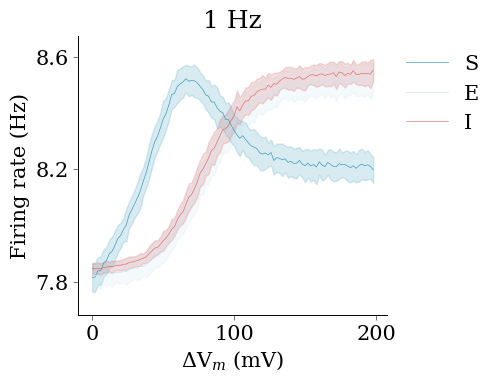

In [212]:
sizex = cm2inch(4.3 * sizeup)
sizey = cm2inch(3.1 * sizeup)
loc = "/Data/calibcurvedata/"

amplist = np.arange(0, 100, 1)  # nA
frequency = 1  # Enter desired frequency

FRmean = np.load(loc + f"FRmean_{frequency}Hz.npy")
FR_std = np.load(loc + f"FRstd_{frequency}Hz.npy")
voltdel = []
for amp in amplist:
    voltdel.append(amp2dev(amp))  # mV
voltdel = np.array(voltdel)
amplist = voltdel

x = [20, 38, 68, 160]
y = [FRmean[0][10], FRmean[0][19], FRmean[0][34], FRmean[0][80]]
plt.figure(figsize=(sizex, sizey))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylabel("Firing rate (Hz)")
plt.yticks(
    [
        rounder(FRmean.min()),
        rounder((FRmean.max() + FRmean.min()) / 2),
        rounder(FRmean.max()),
    ]
)

plt.plot(amplist, FRmean[0], "g", label="S", color=col_s)
plt.fill_between(
    amplist, FRmean[0] - FR_std[0], FRmean[0] + FR_std[0], alpha=0.2, color=col_s
)


plt.plot(amplist, FRmean[1], "b", label="E", color=col_e)
plt.fill_between(
    amplist, FRmean[1] - FR_std[1], FRmean[1] + FR_std[1], alpha=0.2, color=col_e
)
plt.plot(amplist, FRmean[2], "r", label="I", color=col_i)
plt.fill_between(
    amplist, FRmean[2] - FR_std[2], FRmean[2] + FR_std[2], alpha=0.2, color=col_i
)
plt.margins(y=0.1)
plt.xlabel(r"$\Delta$V$_{m}$ (mV)")
plt.legend(bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.title(f"{frequency} Hz")

# FR distribution

/tmp/ipykernel_13519/2091120517.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


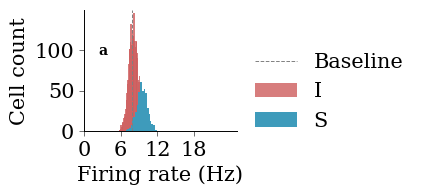

In [213]:
loc = "/Data/"
stims = [
    "10Hz_10nA_100p_10pc_cicle10k",
    "10Hz_19.6856nA_100p_10pc_cicle10k",
    "10Hz_34nA_100p_10pc_cicle10k",
]

sizex = cm2inch(5)
sizey = cm2inch(4)

# for stim in stims:
stim = stims[0]  # 0=a,1=b, 2=c,4=d amplitudes, adjust label accordingly
rate_set = {}
pops = ["stim", "exc", "inh"]
rate_set["stim"] = (np.load(loc + stim + "/" + "seed_1_stim_rate_stim.npy"))[0] / 10
rate_set["exc"] = (np.load(loc + stim + "/" + "seed_1_stim_rate_exc.npy"))[0] / 10
rate_set["inh"] = (np.load(loc + stim + "/" + "seed_1_stim_rate_inh.npy"))[0] / 10

binwidth = 0.25
bins = 100
plt.figure(figsize=(sizex, sizey))
plt.yticks([0, 50, 100])
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Cell count")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(7.8, color="grey", linestyle="dashed", linewidth=0.7, label="Baseline")
plt.hist(rate_set["inh"], bins=bins, color=col_i, label="I", width=binwidth)
plt.hist(rate_set["stim"], bins=bins, color=col_s, label="S", width=binwidth)
plt.xticks([0, 6, 12, 18])
plt.xlim((0, 25))
plt.ylim((0, 150))
plt.text(sizex * 1.2, sizey * 60, "a", fontweight="bold")  # 250, 300
plt.legend(bbox_to_anchor=(1, 0.8), frameon=False)
plt.tight_layout()

plt.show()

# Heat map

Text(0.5, 25.48600174978126, '$\\Delta$V$_{m}$ (mV)')

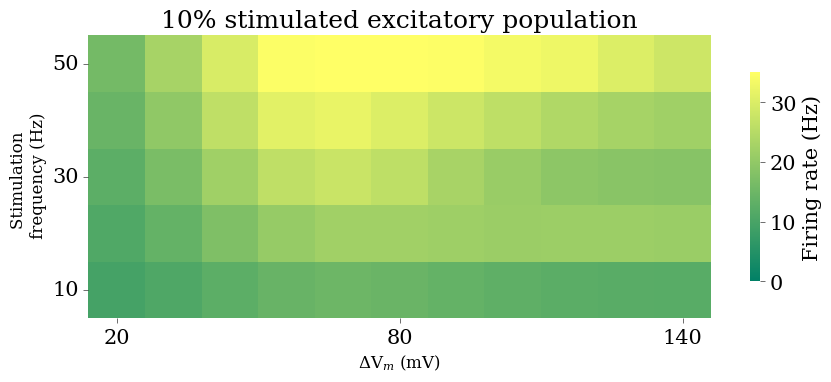

In [214]:
sizex = cm2inch(8.5 * sizeup)
sizey = cm2inch(2 * sizeup)

list = np.arange(10000, 71000, 6000)
amplist = list
ii = 0
FRmeandata = {}
FRstddata = {}
FRsemdata = {}
slopedata = {}

FRmeandata2 = {}
for amp in amplist:
    scriptpath = "/python_scripts/"
    datapath = (
        "/Data/freqscan_10pc_corrected/freqscan_static_10pc_"
        + str(int(amplist[ii]))
        + "pA/"
    )
    Experiment = "Experiment.yaml"
    seed = 1
    extension = "0.1pc_seed_1"

    freqlist = np.arange(10, 51, 10)

    ###################################################################################
    # Load Parameters and unpack
    ###################################################################################
    yaml_files = ["network.yaml", "simulation.yaml", Experiment]

    for file in yaml_files:  # install yaml beforehand
        with open(scriptpath + file) as file:
            parameters = yaml.full_load(file)
        locals().update(parameters)
    ####################################################################################
    n_pulses = 900
    TMS_amplitude = float(amp)

    FR = {}
    for xx in freqlist:
        FR[xx] = [
            np.load(
                datapath
                + extension
                + "_freq"
                + str(xx)
                + "_amp_"
                + str(TMS_amplitude)
                + "_FR.npy"
            ),
            np.load(
                datapath
                + extension
                + "_freq"
                + str(xx)
                + "_amp_"
                + str(TMS_amplitude)
                + "All_Steps.npy"
            ),
        ]

    indlist = np.arange(0, len(freqlist), 1)

    freqlist2 = []
    for yy in indlist:
        freqlist2.append(freqlist[yy])

    stimulated_fraction_plot = stimulated_fraction * 100

    FRmean = np.zeros((3, len(freqlist2)))
    FR_sem = np.zeros((3, len(freqlist2)))
    FR_std = np.zeros((3, len(freqlist2)))

    aux = 0
    for xx in freqlist2:
        for yy in range(0, 3):
            FRmean[yy][aux] = np.mean(FR[xx][0][yy][:-1])
            FR_std[yy][aux] = np.std(FR[xx][0][yy][:-1])
            FR_sem[yy][aux] = sp.sem(FR[xx][0][yy][:-1])

        aux += 1
        FRmeandata2[amp] = [xx, FRmean[0]]
    amp_nano = int(pico2nano(amp))
    voltdev = int(amp2dev(amp) / 1000)  # mV

    FRmeandata[voltdev] = FRmean[:][0]

    ii += 1

df = pd.DataFrame(data=FRmeandata)
# sns.heatmap(df)
df["Stimulation Frequency (Hz)"] = freqlist2
df = df.set_index("Stimulation Frequency (Hz)")

plt.figure(figsize=(sizex, sizey * 2.3), facecolor="white")
plt.title("10% stimulated excitatory population")
ax = sns.heatmap(
    df,
    cmap="summer",
    cbar_kws={
        "shrink": 0.5,
        "use_gridspec": False,
        "location": "right",
        "label": "Firing rate (Hz)",
    },
    vmin=0,
    vmax=35,
    xticklabels=5,
    yticklabels=2,
)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 5, 10, 15, 20, 25, 30, 35])
cbar.set_ticks([0, 10, 20, 30])

ax.set_aspect("equal")

# ax=sns.heatmap(df,cbar_kws={'label': 'Firing Rate (Hz)'})
ax.invert_yaxis()
plt.xticks(rotation=0)
plt.yticks(rotation=0)
subfontsize = 12
plt.ylabel("Stimulation \n frequency (Hz)", fontsize=subfontsize)
plt.xlabel(r"$\Delta$V$_{m}$ (mV)", fontsize=subfontsize)

# Figure 3

# Growth time

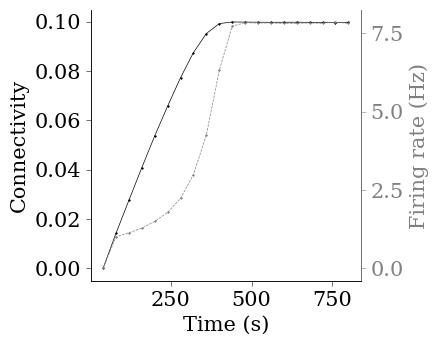

In [215]:
plt.rcParams["axes.linewidth"] = 0.5

squeeze = 0.95
sizex = cm2inch(4 * sizeup * squeeze)
sizey = cm2inch(3 * sizeup)

loc = "/Data/growthdata/"
FR = np.load(loc + "seed_1_growth_FR.npy")
C = np.load(loc + "seed_1_growth_Con.npy")
s = np.load(loc + "seed_1_growth_Steps.npy")

s /= 1000
x = len(s)
f = plt.figure(figsize=(sizex, sizey))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.set_ylabel("Connectivity", color="black")
ax.tick_params(axis="y", colors="black")
plt.plot(s, C[0, 0, :x], color="black", marker="*", ms=1)
plt.gca().spines["top"].set_visible(False)
ax2 = ax.twinx()
ax2.spines["right"].set_color("grey")
ax2.spines["left"].set_color("black")
ax2.tick_params(axis="y", colors="grey")  # col_s)
ax2.set_yticks([0, 2.5, 5, 7.5])
ax2.spines["top"].set_visible(False)
ax2.set_ylabel("Firing rate (Hz)", color="grey")
ax2.plot(s, FR[0, :x], color="grey", linestyle="--", marker="*", ms=1)
ax.set_xlabel("Time (s)")

plt.tight_layout()

# Plastic sample result

In [ ]:
datapath = f"/Data/10Hz_34nA_900p_10pc/"

FR = (
    np.load(datapath + "seed_1_growth_FR.npy")
    + np.load(datapath + "seed_1_stim_FR.npy")
    + np.load(datapath + "seed_1_post_FR.npy")
    + np.load(datapath + "seed_1_decay_FR.npy")
)

C = (
    np.load(datapath + "seed_1_growth_Con.npy")
    + np.load(datapath + "seed_1_stim_Con.npy")
    + np.load(datapath + "seed_1_post_Con.npy")
    + np.load(datapath + "seed_1_decay_Con.npy")
)

s = np.load(datapath + "seed_1_All_Steps.npy")
s /= 1000
len(s)

sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.2 * sizeup)

plt.figure(figsize=(sizex, sizey))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

rightlim = len(s) - (int(0.2 * len(s)))
leftlim = 9
plt.axvspan(500, 590, 0, 1, color="pink", alpha=0.5, label="stimulation")

plt.plot(s[leftlim:rightlim], FR[1][leftlim:rightlim], c=col_e, label="E")
plt.plot(s[leftlim:rightlim], FR[2][leftlim:rightlim], c=col_i, label="I")
plt.plot(
    s[leftlim:rightlim], FR[0][leftlim:rightlim], c=col_s, label="S"
)  
plt.legend(loc=1, frameon=False)
plt.ylim(top=16)
plt.ylabel("Firing rate (Hz)")
plt.tight_layout()
plt.show

sizex = cm2inch(4 * sizeup)
sizey = cm2inch(4 * sizeup)
plt.figure(figsize=(sizex, sizey))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot(s[leftlim:rightlim], C[0, 0][leftlim:rightlim], c=col_s, label="S-S")
plt.plot(s[leftlim:rightlim], C[0, 1][leftlim:rightlim], c="grey", label="S-E")
# plt.plot(s[leftlim:rightlim], C[1,0][leftlim:rightlim],c='orange',label='E-S')
plt.plot(s[leftlim:rightlim], C[1, 1][leftlim:rightlim], c=col_e, label="E-E")
plt.axvspan(500, 590, 0, 1, color="pink", alpha=0.5, label="Stimulation")
plt.legend(fontsize="small", loc=4, frameon=False)
plt.ylabel("Connectivity")
plt.xlabel("Time (s)")
plt.ylim(top=0.15)
plt.tight_layout()

# Plastic 4 amplitudes

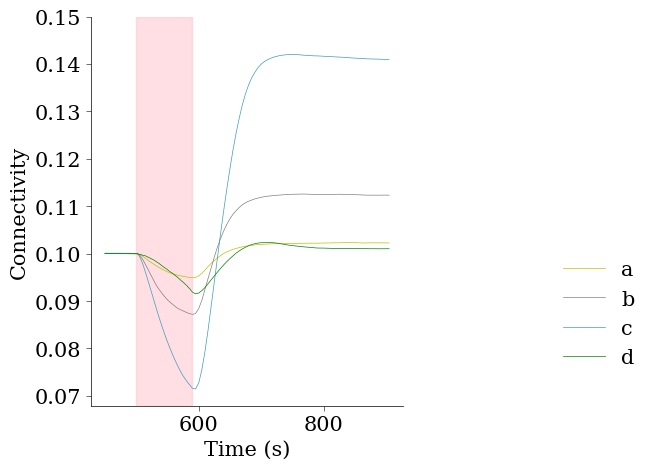

In [217]:
datapath = "/Data/"
stims = [
    "10Hz_10nA_900p_10pc",
    "10Hz_19.6856nA_900p_10pc",
    "10Hz_34nA_900p_10pc",
    "10Hz_80nA_900p_10pc",
]

Cset = {}
Fset = {}
for stim in stims:
    loc = datapath + str(stim) + "/"
    Cset[stim] = (
        np.load(loc + "seed_1_growth_Con.npy")
        + np.load(loc + "seed_1_stim_Con.npy")
        + np.load(loc + "seed_1_post_Con.npy")
        + np.load(loc + "seed_1_decay_Con.npy")
    )
    Fset[stim] = (
        np.load(loc + "seed_1_growth_FR.npy")
        + np.load(loc + "seed_1_stim_FR.npy")
        + np.load(loc + "seed_1_post_FR.npy")
        + np.load(loc + "seed_1_decay_FR.npy")
    )

s = np.load(loc + "seed_1_All_Steps.npy")
s /= 1000


def amp2dev(A):
    delta = 0.5
    tau = 20
    R = 80
    U_short = A * R * (delta / tau)
    return U_short


sizex = cm2inch(9.2 * sizeup)
sizey = cm2inch(4 * sizeup)


label10 = "a"  # str(int(amp2dev(10))) + ' mV'
label19 = "b"  # str(int(amp2dev(19.68)))+ ' mV'
label34 = "c"  # str(int(amp2dev(34)))+ ' mV'
label80 = "d"  # str(int(amp2dev(80)))+ ' mV'


plt.figure(figsize=(sizex, sizey))
leftlim = 9
rightlim = 164
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# fig = plt.figure()
plt.plot(
    s[leftlim:rightlim], Cset[stims[0]][0, 0][leftlim:rightlim], label=label10, c="y"
)  # weak
plt.plot(
    s[leftlim:rightlim], Cset[stims[1]][0, 0][leftlim:rightlim], label=label19, c="grey"
)  # corresp
plt.plot(
    s[leftlim:rightlim], Cset[stims[2]][0, 0][leftlim:rightlim], label=label34, c=col_s
)  # optimal
plt.plot(
    s[leftlim:rightlim],
    Cset[stims[3]][0, 0][leftlim:rightlim],
    label=label80,
    c="green",
)  # overdose
plt.axvspan(500, 590, 0, 1, color="pink", alpha=0.5)  # , label='Stimulation')
plt.ylim(top=0.15)
plt.xlabel("Time (s)")
plt.ylabel("Connectivity")
plt.legend(bbox_to_anchor=[1.8, 0.05], frameon=False, loc=4)
plt.tight_layout()

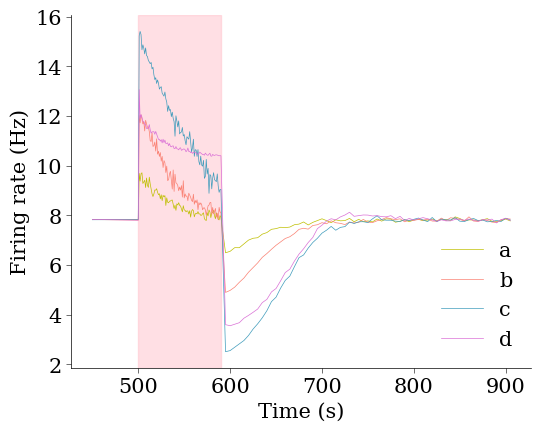

In [218]:
sizex = cm2inch(14)
sizey = cm2inch(13.2 * 0.85)  # 3.5, 3.2


label10 = str(int(amp2dev(10))) + " mV"
label19 = str(int(amp2dev(19.68))) + " mV"
label34 = str(int(amp2dev(34))) + " mV"
label80 = str(int(amp2dev(80))) + " mV"


label10 = "a"
label19 = "b"
label34 = "c"
label80 = "d"


plt.figure(figsize=(sizex, sizey))
leftlim = 9
rightlim = 164
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot(
    s[leftlim:rightlim], Fset[stims[0]][0][leftlim:rightlim], label=label10, c="y"
)  # weak
plt.plot(
    s[leftlim:rightlim], Fset[stims[1]][0][leftlim:rightlim], label=label19, c="salmon"
)  # corresp
plt.plot(
    s[leftlim:rightlim], Fset[stims[2]][0][leftlim:rightlim], label=label34, c=col_s
)  # optimal
plt.plot(
    s[leftlim:rightlim], Fset[stims[3]][0][leftlim:rightlim], label=label80, c="orchid"
)  # overdose
plt.axvspan(500, 590, 0, 1, color="pink", alpha=0.5)  # , label='Stimulation')
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.legend(frameon=False, loc=4)
plt.tight_layout()

# Figure 4

# Scatter Plot

<Figure size 472.441x377.953 with 0 Axes>

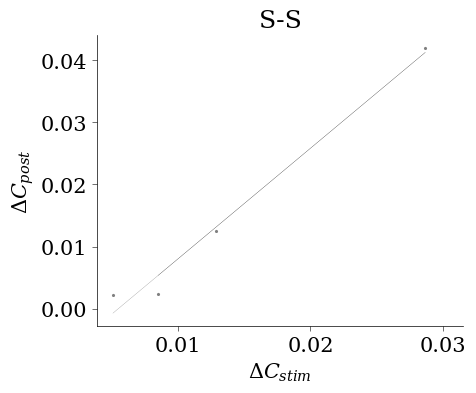

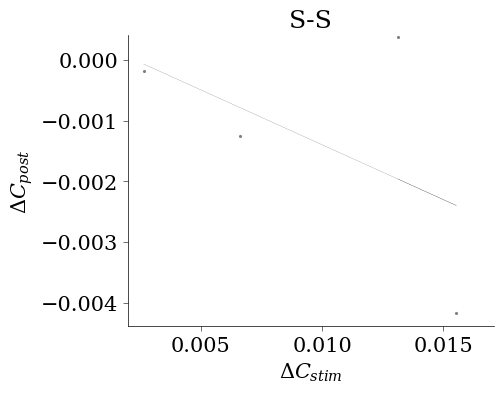

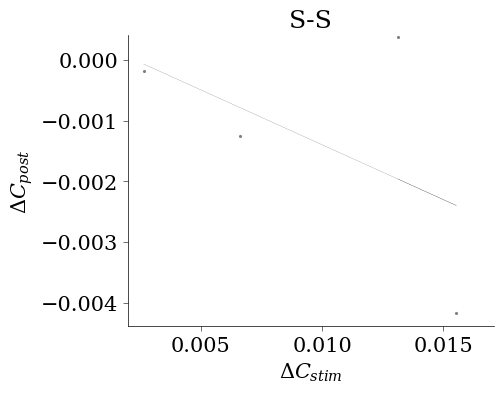

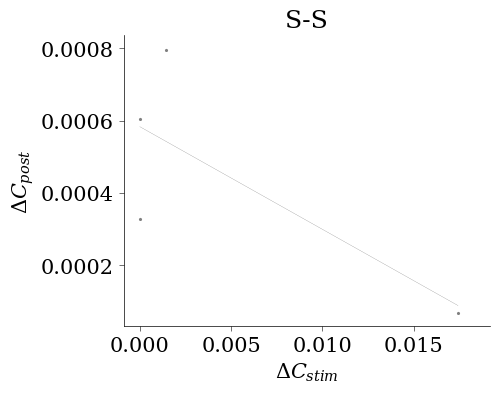

In [219]:
leftlim = 9
leftlim_formax = 100

datapath = "/Data/"
stims = [
    "10Hz_10nA_900p_10pc",
    "10Hz_19.6856nA_900p_10pc",
    "10Hz_34nA_900p_10pc",
    "10Hz_80nA_900p_10pc",
]

Cset = {}
Fset = {}
for stim in stims:
    loc = datapath + str(stim) + "/"
    Cset[stim] = (
        np.load(loc + "seed_1_growth_Con.npy")
        + np.load(loc + "seed_1_stim_Con.npy")
        + np.load(loc + "seed_1_post_Con.npy")
        + np.load(loc + "seed_1_decay_Con.npy")
    )
    Fset[stim] = (
        np.load(loc + "seed_1_growth_FR.npy")
        + np.load(loc + "seed_1_stim_FR.npy")
        + np.load(loc + "seed_1_post_FR.npy")
        + np.load(loc + "seed_1_decay_FR.npy")
    )

s = np.load(loc + "seed_1_All_Steps.npy")
s /= 1000


def amp2dev(A):
    delta = 0.5
    tau = 20
    R = 80
    U_short = A * R * (delta / tau)
    return U_short


# %matplotlib widget
plotpath = "./Figures/"
ll = 0
rr = 4
sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.2 * sizeup)

plt.figure(figsize=(sizex, sizey))
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
maxlist00 = []
minlist00 = []
maxlist01 = []
minlist01 = []
maxlist10 = []
minlist10 = []
maxlist11 = []
minlist11 = []


for stim in stims:
    Cset[stim][0, 0] = Cset[stim][0, 0] - Cset[stim][0, 0][9]
    Cset[stim][1, 0] = Cset[stim][1, 0] - Cset[stim][1, 0][9]
    Cset[stim][0, 1] = Cset[stim][0, 1] - Cset[stim][0, 1][9]
    Cset[stim][1, 1] = Cset[stim][1, 1] - Cset[stim][1, 1][9]

    maxlist00.append(np.max(Cset[stim][0, 0, leftlim_formax:]))
    minlist00.append(np.abs(np.min(Cset[stim][0, 0, (leftlim):])))
    maxlist10.append(np.max(Cset[stim][1, 0, leftlim_formax:]))
    minlist10.append(np.abs(np.min(Cset[stim][1, 0, leftlim:])))
    maxlist01.append(np.max(Cset[stim][0, 1, leftlim_formax:]))
    minlist01.append(np.abs(np.min(Cset[stim][0, 1, leftlim:])))
    maxlist11.append(np.max(Cset[stim][1, 1, leftlim_formax:]))
    minlist11.append(np.abs(np.min(Cset[stim][1, 1, leftlim:])))

minmaxset = [
    (minlist00, maxlist00),
    (minlist01, maxlist01),
    (minlist10, maxlist10),
    (minlist11, maxlist11),
]

labs = ["a", "b", "c", "d"]
headings = ["S-S", "S<-->E", "S<-->E", "E-E"]


# for i, txt in enumerate(labs):
#    plt.annotate(txt, (minlist[i], maxlist[i]),fontsize=5)

for setitem in minmaxset[ll:rr]:
    minlist = setitem[0]
    maxlist = setitem[1]
    heading = headings[ll:rr][0]

    # sizex = cm2inch(4.+1)
    # sizey = cm2inch(3.2)

    plt.figure(figsize=(sizex, sizey))

    m, b = np.polyfit(minlist, maxlist, 1)
    x = minlist
    y = [m * mm + b for mm in minlist]
    # plt.plot(minlist,maxlist)
    plt.scatter(
        minlist[0:4], maxlist[0:4], marker="*", color="grey", s=2
    )  # c=colormap)
    plt.plot(x, y, c="black", lw=0.1)

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(heading)

    plt.xlim(right=np.max(minlist) * 1.1)
    plt.ylim(top=np.max(maxlist) * 1.05)
    plt.xlabel("$\Delta C_{stim}$")
    plt.ylabel("$\Delta C_{post}$")
    plt.show()

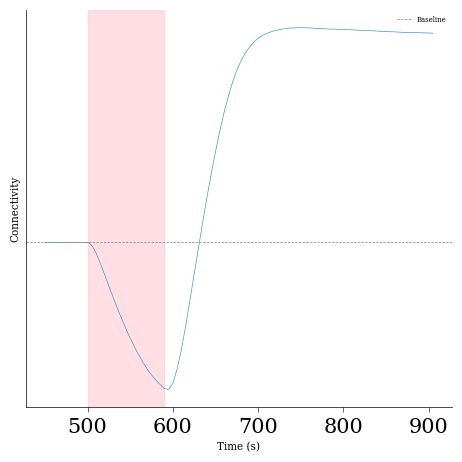

In [221]:
sizex = cm2inch(4 * sizeup)
sizey = cm2inch(4 * sizeup)


label10 = "a"  # str(int(amp2dev(10))) + ' mV'
label19 = "b"  # str(int(amp2dev(19.68)))+ ' mV'
label34 = "c"  # str(int(amp2dev(34)))+ ' mV'
label80 = "b'"  # str(int(amp2dev(80)))+ ' mV'


plt.figure(figsize=(sizex, sizey))
leftlim = 9
rightlim = 164
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
# fig = plt.figure()
# plt.plot(s[leftlim:rightlim],Cset[stims[0]][0,0][leftlim:rightlim],label=label10,c='y')   # weak
# plt.plot(s[leftlim:rightlim],Cset[stims[1]][0,0][leftlim:rightlim],label=label19,c='salmon') # corresp
plt.plot(
    s[leftlim:rightlim], Cset[stims[2]][0, 0][leftlim:rightlim], c=col_s
)  # optimal
plt.axhline(Cset[stims[2]][0, 0][leftlim], ls="dashed", c="grey", label="Baseline")
# plt.plot(s[leftlim:rightlim],Cset[stims[3]][0,0][leftlim:rightlim],label=label80,c='orchid') # overdose
plt.axvspan(500, 590, 0, 1, color="pink", alpha=0.5)  # , label='Stimulation')
# plt.ylim(top=.15)
plt.xlabel("Time (s)", size=axes_labelsize / 2)
plt.ylabel("Connectivity", size=axes_labelsize / 2)
plt.legend(frameon=False, loc=0, fontsize=legend_fontsize / 2)
# plt.xticks([])
plt.yticks([])
plt.tight_layout()

# Connectivity saturation

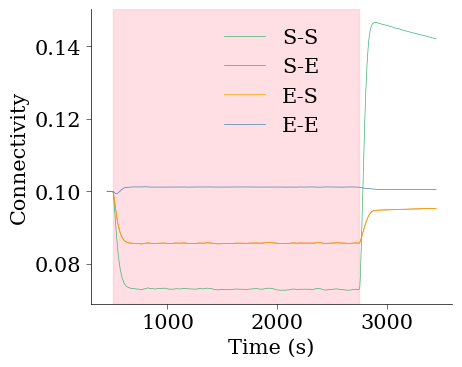

In [222]:
loc = "/Data/10Hz_30nA_10pc_22500p/"
Con = (
    np.load(loc + "seed_1_growth_Con.npy")
    + np.load(loc + "seed_1_stim_Con.npy")
    + np.load(loc + "seed_1_post_Con.npy")
    + np.load(loc + "seed_1_decay_Con.npy")
)
s = np.load(loc + "seed_1_All_Steps.npy")
s /= 1000

sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.2 * sizeup)

leftlim = 9

plt.figure(figsize=(sizex, sizey))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Connectivity")
plt.plot(s[leftlim:], Con[0, 0][leftlim:], c="mediumseagreen", label="S-S")
plt.plot(s[leftlim:], Con[0, 1][leftlim:], c="chocolate", label="S-E")
plt.plot(s[leftlim:], Con[1, 0][leftlim:], c="orange", label="E-S")
plt.plot(s[leftlim:], Con[1, 1][leftlim:], c="steelblue", label="E-E")
plt.axvspan(500, 500 + 2250, 0, 1, color="pink", alpha=0.5)
plt.legend(frameon=False)
plt.tight_layout()

# plt.savefig(plotpath+'Connsaturation.png', dpi=300)

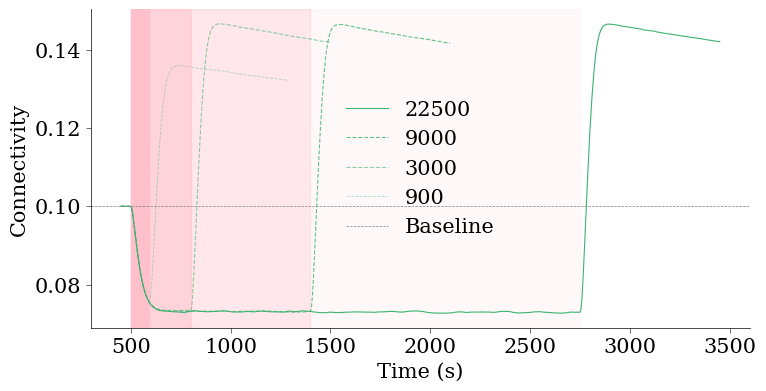

In [223]:
loc = "/Data/10Hz_30nA_10pc_22500p/"
Con = (
    np.load(loc + "seed_1_growth_Con.npy")
    + np.load(loc + "seed_1_stim_Con.npy")
    + np.load(loc + "seed_1_post_Con.npy")
    + np.load(loc + "seed_1_decay_Con.npy")
)
s = np.load(loc + "seed_1_All_Steps.npy")
s /= 1000


loc0 = "/Data/10Hz_30nA_10pc_9000p/"
Con0 = (
    np.load(loc0 + "seed_1_growth_Con.npy")
    + np.load(loc0 + "seed_1_stim_Con.npy")
    + np.load(loc0 + "seed_1_post_Con.npy")
    + np.load(loc0 + "seed_1_decay_Con.npy")
)
s0 = np.load(loc0 + "seed_1_All_Steps.npy")
s0 /= 1000


loc1 = "/Data/10Hz_30nA_10pc_3000p/"
Con1 = (
    np.load(loc1 + "seed_1_growth_Con.npy")
    + np.load(loc1 + "seed_1_stim_Con.npy")
    + np.load(loc1 + "seed_1_post_Con.npy")
    + np.load(loc1 + "seed_1_decay_Con.npy")
)
s1 = np.load(loc1 + "seed_1_All_Steps.npy")
s1 /= 1000


loc2 = "/Data/10Hz_30nA_900p_10pc/"
Con2 = (
    np.load(loc2 + "seed_1_growth_Con.npy")
    + np.load(loc2 + "seed_1_stim_Con.npy")
    + np.load(loc2 + "seed_1_post_Con.npy")
    + np.load(loc2 + "seed_1_decay_Con.npy")
)
s2 = np.load(loc2 + "seed_1_All_Steps.npy")
s2 /= 1000


sizex = cm2inch(8 * sizeup)
sizey = cm2inch(3.4 * sizeup)
leftlim = 9
plt.figure(figsize=(sizex, sizey))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Connectivity")

plt.plot(
    s[leftlim:], Con[0, 0][leftlim:], c="mediumseagreen", alpha=1, label="22500", lw=0.8
)
plt.plot(
    s0[leftlim:],
    Con0[0, 0][leftlim:],
    c="mediumseagreen",
    ls="dashed",
    alpha=0.8,
    label="9000",
    lw=0.8,
)
plt.plot(
    s1[leftlim:],
    Con1[0, 0][leftlim:],
    c="mediumseagreen",
    ls="dashed",
    alpha=0.6,
    label="3000",
    lw=0.8,
)
plt.plot(
    s2[leftlim:],
    Con2[0, 0][leftlim:],
    c="mediumseagreen",
    ls="dashed",
    alpha=0.4,
    label="900",
    lw=0.6,
)

plt.axvspan(500, 500 + 2250, 0, 1, color="pink", alpha=0.1)
plt.axvspan(500, 500 + 900, 0, 1, color="pink", alpha=0.3)
plt.axvspan(500, 500 + 300, 0, 1, color="pink", alpha=0.5)
plt.axvspan(500, 500 + 90, 0, 1, color="pink", alpha=1)

plt.axhline(Con[1, 1][leftlim], ls="dashed", c="grey", label="Baseline")
# plt.axvspan(500,500+100,0,1,color='pink',alpha=1)
# plt.axvspan(500,500+200,0,1,color='pink',alpha=.7)
# plt.axvspan(500,500+300,0,1,color='pink',alpha=0.5)
# plt.axvspan(500,500+400,0,1,color='pink',alpha=0.2)

plt.legend(frameon=False, bbox_to_anchor=(1, 1))
# plt.margins(y=0)
plt.tight_layout()
plt.legend(frameon=False)
# plt.yticks(np.arange(0.094,0.106,0.002))
# plt.margins(y=0.1,x=0.1)

# tau summary

(0.0, 60.0)

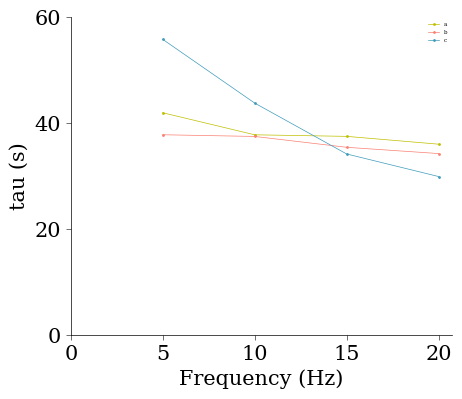

In [224]:
sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.4 * sizeup)
resultspath = "/Data/"
df10 = pd.read_pickle(f"{resultspath}10nA_summary")
row10 = df10.iloc[1]

df34 = pd.read_pickle(f"{resultspath}34nA_summary")
row34 = df34.iloc[1]

df19 = pd.read_pickle(f"{resultspath}19nA_summary")
row19 = df19.iloc[1]


xlabels1 = [5, 10, 15, 20]  # ,60,70,80,90,100]
plt.figure(figsize=(sizex, sizey))
plt.plot(xlabels1, row10, linestyle="-", marker="o", ms=1, label="a", c="y", lw=0.5)
plt.plot(
    xlabels1, row19, linestyle="-", marker="o", ms=1, label="b", c="salmon", lw=0.5
)
plt.plot(xlabels1, row34, linestyle="-", marker="o", ms=1, label="c", c=col_s, lw=0.5)


plt.xticks([0, 5, 10, 15, 20], rotation=0)
plt.yticks(np.arange(0, 80, 20), rotation=0)

# plt.title('tau', fontweight='bold')
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"tau (s)")
plt.legend(frameon=False, fontsize=4)
plt.gca().set_ylim(bottom=0, top=80)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.ylim(top=60)
# plt.margins(y=.10,x=0.1)

# Pulse number heat map

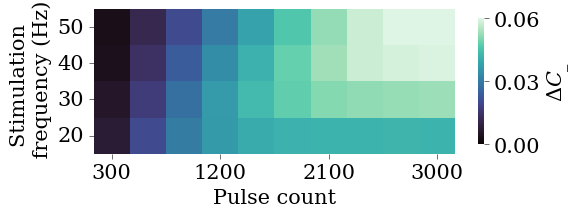

In [225]:
sizex = cm2inch(5 * sizeup)
sizey = cm2inch(3.3 * sizeup)

import numpy as np


def minima(data, baseline):
    import numpy as np

    zeroless = []
    for el in data:
        if el == 0:
            continue
        else:
            zeroless.append(el)
    baseline_corrected = [baseline - x for x in zeroless]

    minima = np.max(baseline_corrected)

    # zeroless = np.sort(zeroless)

    # return zeroless[0],method2
    return minima


list = np.arange(300, 3300, 300)


def pico2nano(pico):
    nano = pico * (0.001)
    return nano


import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import linregress
import seaborn as sns

pulselist = list

ii = 0
FRmeandata = {}
FRstddata = {}
FRsemdata = {}
slopedata = {}

FRmeandata2 = {}
C = {}

Cmindata = {}
for n_p in pulselist:
    scriptpath = "/python_scripts/"
    # datapath = "/Data/freqscan_static_" + str(amplist[ii]) + "pA/"
    # datapath = "/Data/freqscan_10pc_corrected/freqscan_static_10pc_" + str(int(amplist[ii])) + "pA/"

    Experiment = "Experiment.yaml"
    seed = 1
    extension = "seed_1"
    freqlist = np.arange(20, 60, 10)

    ###################################################################################
    # Load Parameters and unpack
    ###################################################################################
    yaml_files = ["network.yaml", "simulation.yaml", Experiment]

    for file in yaml_files:  # install yaml beforehand
        with open(scriptpath + file) as file:
            parameters = yaml.full_load(file)
        locals().update(parameters)
    ####################################################################################
    n_pulses = n_p
    amp = 30000.0
    TMS_amplitude = amp

    FR = {}

    for xx in freqlist:
        if xx == 10:
            datapath = "/Data/10Hz_30nA_10pc_pulsenumscan/"
            extension = "0.1pc_seed_1"

            FR[xx] = [
                np.load(
                    datapath
                    + extension
                    + "_freq"
                    + str(xx)
                    + "_amp_"
                    + str(TMS_amplitude)
                    + "_npulses_"
                    + str(n_p)
                    + "_FR.npy"
                ),
                np.load(
                    datapath
                    + extension
                    + "_freq"
                    + str(xx)
                    + "_amp_"
                    + str(TMS_amplitude)
                    + "_npulses_"
                    + str(n_p)
                    + "_All_Steps.npy"
                ),
            ]
        else:
            datapath = (
                "/Data/freq_vs_ps/ps_"
                + str(n_p)
                + "/"
                + f"{xx}Hz_30nA_10pc_{n_p}ps/"
            )

            FR[xx] = [
                np.load(datapath + extension + "_stim_FR.npy"),
                np.load(datapath + extension + "_All_Steps.npy"),
            ]

            C[xx] = [
                np.load(datapath + extension + "_stim_Con.npy"),
                np.load(datapath + extension + "_growth_Con.npy"),
                np.load(datapath + extension + "_All_Steps.npy"),
            ]

    indlist = np.arange(0, len(freqlist), 1)

    stimulated_fraction_plot = stimulated_fraction * 100

    FRmean = np.zeros((3, len(freqlist)))
    FR_sem = np.zeros((3, len(freqlist)))
    FR_std = np.zeros((3, len(freqlist)))

    aux = 0
    for xx in freqlist:
        for yy in range(0, 3):
            FRmean[yy][aux] = np.max(FR[xx][0][yy][:-1])
            FR_std[yy][aux] = np.std(FR[xx][0][yy][:-1])
            FR_sem[yy][aux] = sp.sem(FR[xx][0][yy][:-1])
        aux += 1
        FRmeandata2[amp] = [xx, FRmean[0]]
    amp_nano = int(pico2nano(amp))
    FRmeandata[n_p] = FRmean[:][0]

    Cmin = {}
    aux2 = 0
    for yy in freqlist:
        Cmin[aux2] = minima(C[yy][0][0, 0], C[yy][1][0, 0][9])

        aux2 += 1

    Cmindata[n_p] = Cmin
    ii += 1

df = pd.DataFrame(data=Cmindata)  #

df["Stimulation Frequency (Hz)"] = freqlist
df = df.set_index("Stimulation Frequency (Hz)")

plt.figure(figsize=(sizex, sizey))
ax = sns.heatmap(
    df,
    cmap="mako",
    linewidths=0.0,
    cbar_kws={"shrink": 0.35, "label": "$\Delta C_{\_}$"},
    vmin=0.0,
    vmax=0.06,
    xticklabels=3,
)  # ,vmax=0.06)#,xticklabels = 10)
# cmap="mako_r"
# ax.linewidth(0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.03, 0.06])
ax.set_aspect("equal")
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.ylabel("Stimulation \n frequency (Hz)")
plt.xlabel("Pulse count")
plt.tight_layout()


# Figure 5

# iTBS 4 amps

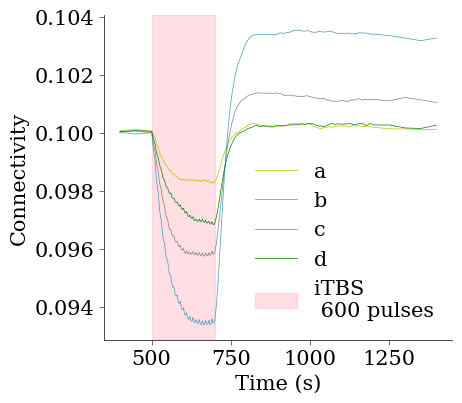

In [226]:
stims = ['iTBS_10nA_10pc', 'iTBS_19.685nA_10pc', 'iTBS_34nA_10pc','iTBS_80nA_10pc']
datapath = '/Data/'
Cset = {}
Fset = {}
for stim in stims:
    loc = datapath + str(stim) + '/'
    Cset[stim] = np.load(loc + 'seed_1_growth_Con.npy') + np.load(loc + 'seed_1_stim_Con.npy') + np.load(loc + 'seed_1_post_Con.npy') + np.load(loc + 'seed_1_decay_Con.npy')
    Fset[stim] = np.load(loc + 'seed_1_growth_FR.npy') + np.load(loc + 'seed_1_stim_FR.npy') + np.load(loc + 'seed_1_post_FR.npy') + np.load(loc + 'seed_1_decay_FR.npy') 
s = np.load(datapath + stims[1] + '/' + 'seed_1_All_Steps.npy')   
s /= 1000


sizex = cm2inch(4*sizeup)
sizey = cm2inch(3.5*sizeup)

plt.figure(figsize=(sizex,sizey))
leftlim = 8
rightlim = len(s)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#fig = plt.figure()
plt.plot(s[leftlim:rightlim],Cset[stims[0]][0,0][leftlim:rightlim],label='a',c='y')
plt.plot(s[leftlim:rightlim],Cset[stims[1]][0,0][leftlim:rightlim],label='b',c='grey')
plt.plot(s[leftlim:rightlim],Cset[stims[2]][0,0][leftlim:rightlim],label='c',c=col_s)
plt.plot(s[leftlim:rightlim],Cset[stims[3]][0,0][leftlim:rightlim],label="d",c='green')
plt.axvspan(500,500+200,0,1,color='pink',alpha=0.5, label='iTBS \n 600 pulses')
plt.xlabel('Time (s)')
plt.ylabel('Connectivity')
plt.legend(frameon=False,loc=4)
plt.tight_layout()

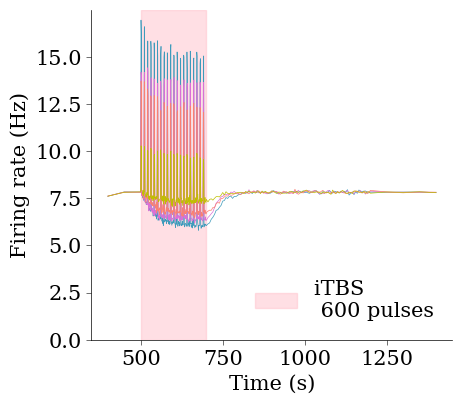

In [227]:
sizex = cm2inch(4 * sizeup)
sizey = cm2inch(3.5 * sizeup)

plt.figure(figsize=(sizex, sizey))
leftlim = 8
rightlim = len(s)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.plot(s[leftlim:rightlim], Fset[stims[2]][0][leftlim:rightlim], c=col_s)  # optimal
plt.plot(
    s[leftlim:rightlim], Fset[stims[3]][0][leftlim:rightlim], c="orchid"
)  # overdose
plt.plot(
    s[leftlim:rightlim], Fset[stims[1]][0][leftlim:rightlim], c="salmon"
)  # corresp
plt.plot(s[leftlim:rightlim], Fset[stims[0]][0][leftlim:rightlim], c="y")  # weak

# plt.yticks([5,10,15,20])
plt.axvspan(500, 500 + 200, 0, 1, color="pink", alpha=0.5, label="iTBS \n 600 pulses")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.ylim(bottom=0)
plt.legend(frameon=False, loc=4)
plt.tight_layout()